In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat
import auxiliary_functions

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg

from sankeyflow import Sankey

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


## First Plot

In [27]:
selected_lamdas = np.logspace(-5,0,10)

Conditional_S_selected_hr = []
for i, lamda in enumerate(selected_lamdas):
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/conditional_S_selected_hr/S_rate{lamda:.11f}', 'rb') as f:
        S_rate = pickle.load(f)
        Conditional_S_selected_hr.append(S_rate['S_rate'][f'{lamda:.11f}']) #(S[list(S.keys))[0]][0])

## Second and Third Plot

In [2]:
net_rw = ContTempNetwork.load('/home/b/skoove/Desktop/entropy/paper_data/socio_pat_primary_school/primaryschoolnet',
                              attributes_list=['node_to_label_dict',
                      'events_table',
                      'times',
                      'time_grid',
                      'num_nodes',
                      '_overlapping_events_merged',
                      'start_date',
                      'node_label_array',
                      'male_array',
                      'female_array',
                      'node_first_start_array',
                      'node_last_end_array',
                      'node_class_array',
                      'datetimes'])

In [3]:
import pandas as pd
df = pd.read_csv('../paper_data/socio_pat_primary_school/primaryschool.csv',
                 header=None, sep='\t', names=['time','id1','id2','class1','class2'])

In [4]:
df['hour'] = df['time'] // 3600
df['minute'] = (df['time'] % 3600) / 60

In [5]:
net_times_hours = net_rw.times / 3600
flag10 = np.argmax(net_times_hours > 10)
flag12 = np.argmax(net_times_hours > 12)
flag14 = np.argmax(net_times_hours > 14)
flag16 = np.argmax(net_times_hours > 16)
flagday1 = np.argmax(net_times_hours > 18)
print(flag10, flag12, flag14, flag16, flagday1)

240 600 960 1320 1556


In [6]:
lamdas_growing = np.logspace(-5,0,200)

In [22]:
multi_res_rw = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/clustersplot/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)
        
    multi_res_rw[lamda] = cluster
avg_nclusters_forw_rw = [np.mean([len(c) for c in \
                   multi_res_rw[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_rw = [avg_norm_var_information(multi_res_rw[lamda]) for lamda in lamdas_growing]

In [9]:
multi_res_rw0_240 = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/clustersplot0_240/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)
        
    multi_res_rw0_240[lamda] = cluster
avg_nclusters_forw_rw0_240 = [np.mean([len(c) for c in \
                   multi_res_rw0_240[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_rw0_240 = [avg_norm_var_information(multi_res_rw0_240[lamda]) for lamda in lamdas_growing]

In [10]:
multi_res_rw240_600 = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/clustersplot240_600/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)
        
    multi_res_rw240_600[lamda] = cluster
avg_nclusters_forw_rw240_600 = [np.mean([len(c) for c in \
                   multi_res_rw240_600[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_rw240_600 = [avg_norm_var_information(multi_res_rw240_600[lamda]) for lamda in lamdas_growing]

In [11]:
multi_res_rw600_960 = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/clustersplot600_960/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)
        
    multi_res_rw600_960[lamda] = cluster
avg_nclusters_forw_rw600_960 = [np.mean([len(c) for c in \
                   multi_res_rw600_960[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_rw600_960 = [avg_norm_var_information(multi_res_rw600_960[lamda]) for lamda in lamdas_growing]

In [12]:
multi_res_rw960_1320 = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/clustersplot960_1320/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)
        
    multi_res_rw960_1320[lamda] = cluster
avg_nclusters_forw_rw960_1320 = [np.mean([len(c) for c in \
                   multi_res_rw960_1320[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_rw960_1320 = [avg_norm_var_information(multi_res_rw960_1320[lamda]) for lamda in lamdas_growing]

In [13]:
multi_res_rw960_1320 = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/clustersplot960_1320/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)
        
    multi_res_rw960_1320[lamda] = cluster
avg_nclusters_forw_rw960_1320 = [np.mean([len(c) for c in \
                   multi_res_rw960_1320[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_rw960_1320 = [avg_norm_var_information(multi_res_rw960_1320[lamda]) for lamda in lamdas_growing]

In [14]:
multi_res_rw1320_1556 = {}
for lamda in lamdas_growing:
    with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/clustersplot1320_1556/cluster{lamda:.11f}', 'rb') as f:
        cluster = pickle.load(f)
        
    multi_res_rw1320_1556[lamda] = cluster
avg_nclusters_forw_rw1320_1556 = [np.mean([len(c) for c in \
                   multi_res_rw1320_1556[lamda] if len(c)>1]) for lamda in lamdas_growing]

NVI_forw_rw1320_1556 = [avg_norm_var_information(multi_res_rw1320_1556[lamda]) for lamda in lamdas_growing]

In [15]:
bestcluster0_240 = multi_res_rw0_240[lamdas_growing[170]][0]
bestcluster240_600 = multi_res_rw240_600[lamdas_growing[135]][0]
bestcluster600_960 = multi_res_rw600_960[lamdas_growing[180]][0]
bestcluster960_1320 = multi_res_rw960_1320[lamdas_growing[125]][0]
bestcluster1320_1556 = multi_res_rw1320_1556[lamdas_growing[90]][0]
bestclusters = [bestcluster0_240, bestcluster240_600, bestcluster600_960, bestcluster960_1320, bestcluster1320_1556]

#%% make data for flow diagram

source_comms = bestcluster0_240
target_comms = bestcluster240_600
class_dict = {clas : set(net_rw.node_array[net_rw.node_class_array == clas]) for \
                  clas in np.unique(net_rw.node_class_array)}

flows = []
for clas, clas_set in class_dict.items():
    for s, comm_s in enumerate(source_comms):
        for t, comm_t in enumerate(target_comms):
            val = len(clas_set.intersection(comm_s).intersection(comm_t))
            if val > 0:
                flows.append({'source': s, 'target': t, 'type': clas, 'value': val})

df_flows0_600 = pd.DataFrame.from_dict(flows)

#%% make data for flow diagram

source_comms = bestcluster240_600
target_comms = bestcluster600_960
class_dict = {clas : set(net_rw.node_array[net_rw.node_class_array == clas]) for \
                  clas in np.unique(net_rw.node_class_array)}

flows = []
for clas, clas_set in class_dict.items():
    for s, comm_s in enumerate(source_comms):
        for t, comm_t in enumerate(target_comms):
            val = len(clas_set.intersection(comm_s).intersection(comm_t))
            if val > 0:
                flows.append({'source': s, 'target': t, 'type': clas, 'value': val})

df_flows240_960 = pd.DataFrame.from_dict(flows)
 
#%% make data for flow diagram

source_comms = bestcluster600_960
target_comms = bestcluster960_1320
class_dict = {clas : set(net_rw.node_array[net_rw.node_class_array == clas]) for \
                  clas in np.unique(net_rw.node_class_array)}

flows = []
for clas, clas_set in class_dict.items():
    for s, comm_s in enumerate(source_comms):
        for t, comm_t in enumerate(target_comms):
            val = len(clas_set.intersection(comm_s).intersection(comm_t))
            if val > 0:
                flows.append({'source': s, 'target': t, 'type': clas, 'value': val})

df_flows600_1320 = pd.DataFrame.from_dict(flows)

#%% make data for flow diagram

source_comms = bestcluster960_1320
target_comms = bestcluster1320_1556
class_dict = {clas : set(net_rw.node_array[net_rw.node_class_array == clas]) for \
                  clas in np.unique(net_rw.node_class_array)}

flows = []
for clas, clas_set in class_dict.items():
    for s, comm_s in enumerate(source_comms):
        for t, comm_t in enumerate(target_comms):
            val = len(clas_set.intersection(comm_s).intersection(comm_t))
            if val > 0:
                flows.append({'source': s, 'target': t, 'type': clas, 'value': val})

df_flows960_1556 = pd.DataFrame.from_dict(flows)

In [16]:
df_flows0_600['target_label'] = df_flows0_600['target'] + int(np.max(df_flows0_600['source']) + 1)

df_flows240_960['source'] = df_flows240_960['source'] + int(np.max(df_flows0_600['source']) + 1)
df_flows240_960['target_label'] = df_flows240_960['target'] + int(np.max(df_flows240_960['source']) + 1)

df_flows600_1320['source'] = df_flows600_1320['source'] + int(np.max(df_flows240_960['source']) + 1)
df_flows600_1320['target_label'] = df_flows600_1320['target'] + int(np.max(df_flows600_1320['source']) + 1)

df_flows960_1556['source'] = df_flows960_1556['source'] + int(np.max(df_flows600_1320['source']) + 1)
df_flows960_1556['target_label'] = df_flows960_1556['target'] + int(np.max(df_flows960_1556['source']) + 1)

df_flows = pd.concat([df_flows0_600, df_flows240_960, df_flows600_1320, df_flows960_1556], ignore_index=True)

# Combined Plot

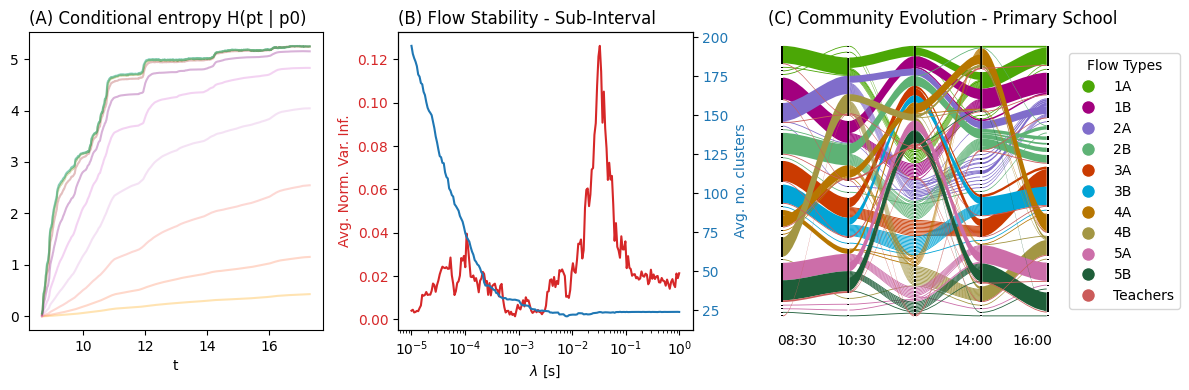

In [31]:
# Start creating the figure
fig = plt.figure(figsize=(12, 4))  # Wider figure for all plots in one row
gs = fig.add_gridspec(1, 3)  # Grid: 1 row, 4 columns

# Column 1: Plot A
ax_a = fig.add_subplot(gs[0, 0])

#Plot 5
list_colors = ['orange', 'coral', 'salmon', 'plum', 'orchid', 'purple', 'brown', 'olive', 'green', 'lightseagreen']

for i, lamda in enumerate(selected_lamdas):
    S = Conditional_S_selected_hr[i]
    ax_a.plot(net_times_hours[0:1556], S[0:1556], color = list_colors[i], alpha = 0.30, label='lamda = ' + f'{lamda:.11f}')
ax_a.set_xlabel('t')
ax_a.set_title('(A) Conditional entropy H(pt | p0)', loc='left', fontsize=12)

# Column 2: Plot B

####### First Plot
ax_b = fig.add_subplot(gs[0, 1])
color = 'tab:red'
ax_b.plot(lamdas_growing, NVI_forw_rw960_1320, color=color, label='static norm NVI')

ax_b.set_xscale('log')
ax_b.set_xlabel(r'$\lambda$ [s]')
ax_b.set_ylabel('Avg. Norm. Var. Inf.', color=color)
ax_b.tick_params(axis='y', labelcolor=color)
ax_b.set_title("(B) Flow Stability - Sub-Interval", loc='left', fontsize=12)

ax1 = ax_b.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax1.plot(lamdas_growing, avg_nclusters_forw_rw960_1320, color=color, label='edge-centric')

ax1.set_xlabel(r'$\lambda$ [s]')
ax1.set_ylabel('Avg. no. clusters', color=color)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color)

# Column 3: Plot C (Square aspect ratio)

# Sample data
list_value = df_flows['value'].copy()
list_value[df_flows['value'] == 1] = 1

# Define the nodes and flows
nodes = [
    [(node, df_flows0_600[df_flows0_600['source'] == node]['value'].sum(), dict(color="black")) for node in df_flows0_600['source'].unique()],
    [(node, df_flows240_960[df_flows240_960['source'] == node]['value'].sum(), dict(color="black")) for node in df_flows240_960['source'].unique()],
    [(node, df_flows600_1320[df_flows600_1320['source'] == node]['value'].sum(), dict(color="black")) for node in df_flows600_1320['source'].unique()],
    [(node, df_flows960_1556[df_flows960_1556['source'] == node]['value'].sum(), dict(color="black")) for node in df_flows960_1556['source'].unique()],
    [(node, df_flows960_1556[df_flows960_1556['target_label'] == node]['value'].sum(), dict(color="black")) for node in df_flows960_1556['target_label'].unique()],
]

# Define colors for each link
color_list = [
    "#4ba706", "#a2007e", "#806dcb", "#5eb275", "#ca3b01",
    "#01a4d6", "#b77600", "#a39643", "#cc6ea9", "#1e5e39", "#cb5b5a"
]

dict_color = {df_type: color_list[i] for i, df_type in enumerate(df_flows['type'].unique())}
link_colors = [dict_color[df_flows['type'][i]] for i in range(df_flows.shape[0])]

flows = [(df_flows['source'][index], df_flows['target_label'][index], df_flows['value'][index], {'color': link_colors[index]}) for index in df_flows.index]

# Adjust the Sankey diagram and add a custom x-axis
ax_c = fig.add_subplot(gs[0, 2])
s = Sankey(flows=flows, nodes=nodes, node_opts=dict(label_format=''))

# Draw the Sankey diagram
s.draw()

# Add custom x-axis labels manually
time_labels = ["08:30", "10:30", "12:00", "14:00", "16:00"]
x_positions = [0.1, 0.3, 0.5, 0.7, 0.9]  # Adjust based on diagram layout

# Add labels using ax.text for precise control
for x_pos, label in zip(x_positions, time_labels):
    ax_c.text(x_pos, -0.05, label, fontsize=10, ha='center', transform=ax_c.transAxes)


# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=dict_color[df_type], markersize=10)
           for df_type in df_flows['type'].unique()]


ax_c.legend(handles, df_flows['type'].unique(), title='Flow Types', loc='center left', bbox_to_anchor=(1, 0.5))
ax_c.set_title("(C) Community Evolution - Primary School", loc='left', fontsize=12)
ax_c.set_yticks([])
ax_c.set_frame_on(False)

# Adjust layout and display
plt.tight_layout()
#plt.savefig('/home/b/skoove/Desktop/primary_school/day1_GCE_filter_fig.png', format='png', dpi=300, bbox_inches='tight')
plt.show()